In [1]:
# !conda install -c anaconda xlrd --y
# !conda install -c anaconda xlwings --y
# !conda install -c anaconda appscript --y
# !pip install aem-cmd
# !pip install aem
# !conda update -n base conda --y
# !pip install pyaem

In [7]:
ls 데이터/

2018년 2차_졸업생의 진로 현황(전체).xlsx*
2018년 시도별 행정구역별 사설학원 현황.xlsx*
2018년_공시대상학교정보(전체).xlsx*
KIKcd_B.20190101.xlsx*
SIG_201804.zip*
XrProjection 설치파일/
XrProjection 변환결과/
json 변환결과/
★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls*
★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xlsx
시·군·구별+미분양현황_2082_128_20181229151931.xlsx*
행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20180821155737.xlsx*
행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20190310191045.xlsx*
행정구역_시군구_별_주민등록세대수_20190107134842.xlsx*
평균매매가격_아파트.xlsx*
평균전세가격_아파트.xlsx*
주택건설인허가실적.xlsx*


In [45]:
# [예제 2.1] pandas.read_excel로 엑셀파일 읽어오기 시도 

# import pandas as pd

# 아래와 같이 KB에서 받은 데이터를 디렉터리와 제목을 합쳐서 문자열로 입력하세요
#path = r'C:\Users\JK\Desktop\부동산 데이터\KB부동산\월간\★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
path = r'데이터/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
# raw_data = pd.read_excel(path, sheet_name='매매종합')

In [31]:
# [예제 2.2] xlwings모듈 활용하여 엑셀 데이터 가져와서 데이터프레임으로 저장 


import xlwings as xw

path = r'데이터/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
# xlwings 모듈로 엑셀 읽기
wb = xw.Book(path)
# sheet 선택
sheet = wb.sheets['매매종합']   
# 시트 행의 개수 계산
row_num = sheet.range((1,1)).end('down').end('down').end('down').row 
# 읽어올 데이터 범위 설정(엑셀 열+행)
data_range = 'A2:GE' + str(row_num)
# options 함수로 pandas 데이터프레임에 쓰기
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

In [32]:
raw_data

,구분,전국,서울,강북,None,None,None,None,None,None,...,None,None,양산,거제,진주,김해,통영,제주도,제주/ 서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.6561,30.0438,41.94,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,34.6561,30.0438,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3,34.708,30.0024,41.8891,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,4,34.4486,29.8366,41.7366,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,5,34.2929,29.588,41.2791,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,6,34.1373,29.3808,41.2791,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,7,34.0335,29.2979,41.2283,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,8,34.0335,29.2979,41.2283,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [36]:
# [예제 2.3] 시-도 데이터와 구-군 데이터를 가져와 리스트로 만들기

big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

In [37]:
# [예제 2.4 small_col] 리스트에서 None 없애기

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]

In [38]:
# [예제 2.5] small_col, big_col 리스트 완성하기 

bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
    
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1

In [39]:
# [예제 2.6] small_col, big_col 예외 부분 수정하기 

big_col[129] = '경기' 
big_col[130] = '경기'
small_col[185] = '서귀포'

In [40]:
# [예제 2.7] 새로운 컬럼 입력하기 

raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1])

In [48]:
# [예제 2.8] 데이터를 읽어와 컬럼을 재설정하여 데이터프레임으로 저장하는 코드 정리 

# import pandas as pd
# import xlwings as xw

# path = r' 여러분이 받은 파일의 디렉터리를 넣으세요 \ KB엑셀 파일명.xls'
wb = xw.Book(path)                
sheet = wb.sheets['매매종합']   
row_num = sheet.range((1,1)).end('down').end('down').end('down').row  
data_range = 'A2:GE' + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

# small_col 리스트의 값이 None 일 경우, big_col의 같은 열 값을 저장
for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
    
    check = num
    while True:
        # bigname_list 를 확인 후, 해당 데이터를 기반으로 big_col을 이전의 컬럼 값으로 저장
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1
# 경기도 광주와 광주시의 이름이 같아서 잘못 들어간 부분 하드 코딩            
big_col[129] = '경기' 
big_col[130] = '경기'
# 원 데이터의 형식이 달라 직접 하드코딩
small_col[185] = '서귀포'

# 정제한 컬럼 값들을 raw_data의 컬럼으로 직접 저장
raw_data.columns = [big_col, small_col]
# drop 함수는 리스트로 지우고 싶은 행의 이름들을 넣어주면 해당 행들을 제거한 새로운 데이터프레임을 생성함
# 0,1 행을 drop 함수를 이용해 제거하고 결과를 new_col_data 변수에 저장
new_col_data = raw_data.drop([0,1])

구분       전국       서울                                               \
         구분       전국       서울       강북      강북구      광진구      노원구      도봉구   
2      86.1  34.6561  30.0438    41.94     None     None     None     None   
3         2  34.6561  30.0438  41.8891     None     None     None     None   
4         3   34.708  30.0024  41.8891     None     None     None     None   
5         4  34.4486  29.8366  41.7366     None     None     None     None   
6         5  34.2929   29.588  41.2791     None     None     None     None   
7         6  34.1373  29.3808  41.2791     None     None     None     None   
8         7  34.0335  29.2979  41.2283     None     None     None     None   
9         8  34.0335  29.2979  41.2283     None     None     None     None   
10        9  34.0335  29.2979  41.2283     None     None     None     None   
11       10  34.0335  29.1736  41.0758     None     None     None     None   
12       11   33.826  28.9249  41.0249     None     None     None     None   
13       12  33.7222  28.7177  40.7708     None     None     None     None   
14     87.1  33.6704  28.7177  40.8724     None     None     None     None   
15        2  33.6185  28.6349  40.8216     None     None     None     None   
16        3  33.5666  28.4691  40.5166     None     None     None     None   
17        4  33.6185  28.3862  40.4657     None     None     None     None   
18        5  33.6185  28.3448  40.4657     None     None     None     None   
19        6  33.6185   28.179  40.0082     None     None     None     None   
20        7  33.6704  28.1376  40.0082     None     None     None     None   
21        8   33.826   28.179  40.0082     None     None     None     None   
22        9   35.123  28.8835  40.8216     None     None     None     None   
23       10  35.6418  29.1321  41.2283     None     None     None     None   
24       11  36.0569  29.2565  41.2283     None     None     None     None   
25       12  36.1087  29.2979    41.33     None     None     None     None   
26     88.1  36.5757  29.5051  41.3808     None     None     None     None   
27        2  37.4576  30.2925  42.0417     None     None     None     None   
28        3  38.3915  30.9141  42.9567     None     None     None     None   
29        4  39.1697  31.4942  43.4651     None     None     None     None   
30        5  39.5328  31.5356  43.4142     None     None     None     None   
31        6  39.8441  31.5356  43.4142     None     None     None     None   
..      ...      ...      ...      ...      ...      ...      ...      ...   
369       8  95.0557  86.1403  87.3341  93.9886   89.788  84.8213  86.7903   
370       9  95.1857  86.4059  87.5472  94.1202  89.9305  85.1075  86.9351   
371      10  95.4155  86.8342  87.8974  94.4417  90.0567    85.61  87.1025   
372      11  95.6562  87.2172  88.2661  94.6626   90.254  86.0757  87.4461   
373      12  95.7265   87.291  88.3621  94.7381  90.3174   86.196  87.5124   
374  2017.1  95.7484  87.3137  88.4163  94.7839  90.3299  86.3516  87.5651   
375       2  95.7586  87.3431  88.4552  94.8054   90.312  86.4637  87.6027   
376       3   95.784   87.414  88.5145  94.8165  90.3186  86.5916  87.6486   
377       4  95.8204  87.5048  88.5949  94.8873  90.3388  86.7127  87.7324   
378       5  95.8698  87.6448  88.6925  94.9142  90.4258  86.8324  87.8078   
379       6  96.0372  88.1252  89.1074  95.0678   91.112  87.6501   88.241   
380       7  96.2617  88.6796   89.642  95.1623  91.4884  88.7935  88.9395   
381       8   96.491   89.296  90.2172  95.4357  91.9929  89.7442  89.8887   
382       9  96.5725  89.4259  90.3587  95.5184  92.2425  89.6877  89.9414   
383      10  96.6813  89.7056  90.5847  95.8087  92.5673  89.8381  90.1313   
384      11  96.8141  90.1014  90.9064   95.944  93.1737  90.0221  90.3756   
385      12  96.9132  90.5076  91.2057  96.1317  93.5745  90.2274   90.623   
386  2018.1  97.0944  91.1494   91.608  96.1806   94.371  90.3453  90.9477   
387       2  97.3038  91.7823  

In [63]:
# new_col_data
# list(new_col_data['구분']['구분'])

In [47]:
# [예제 2.9] 인덱스를 위한 날짜 리스트 만들기 

# 구분/구분 컬럼의 날짜 데이터를 리스트에 저장
index_list = list(new_col_data['구분']['구분'])

new_index = []

# 리스트에 저장한 날짜데이터를 통일화시키기
for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if int(temp[0]) > 12 :
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

        
# [예제 2.10] 만들어진 날짜 리스트를 인덱스로 설정 

# set_index 함수를 이용해서 인덱스 설정
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
# 필요 없어진 구분컬럼 삭제
cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)

In [65]:
cleaned_data.head()

전국       서울                                               \
                 전국       서울       강북   강북구   광진구   노원구   도봉구  동대문구   마포구   
1986-01-01  34.6561  30.0438    41.94  None  None  None  None  None  None   
1986-02-01  34.6561  30.0438  41.8891  None  None  None  None  None  None   
1986-03-01   34.708  30.0024  41.8891  None  None  None  None  None  None   
1986-04-01  34.4486  29.8366  41.7366  None  None  None  None  None  None   
1986-05-01  34.2929   29.588  41.2791  None  None  None  None  None  None   

                  ...     경남                                       제주도        \
            서대문구  ...    의창구   진해구    양산    거제    진주    김해    통영   제주도   서귀포   
1986-01-01  None  ...   None  None  None  None  None  None  None  None  None   
1986-02-01  None  ...   None  None  None  None  None  None  None  None  None   
1986-03-01  None  ...   None  None  None  None  None  None  None  None  None   
1986-04-01  None  ...   None  None  None  None  None  None  None  None  None   
1986-05-01  None  ...   None  None  None  None  None  None  None  None  None   

            기타지방  
            기타지방  
1986-01-01  None  
1986-02-01  None  
1986-03-01  None  
1986-04-01  None  
1986-05-01  None  

[5 rows x 186 columns]

In [98]:
# [예제 2.11] 전처리 함수화 

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range((1,1)).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [99]:
# # OSX 의 설치 된 폰트를 가져오는 함수
# import matplotlib.font_manager as fm
# font_list_mac = fm.OSXInstalledFonts()
# print(len(font_list_mac))
# font_list_mac

In [96]:
# ls

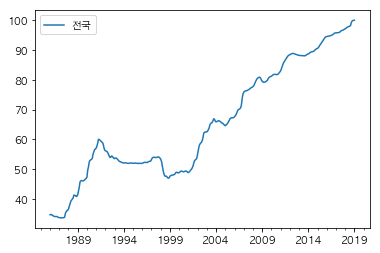

In [100]:
# [예제 2.12] 전처리 함수 사용 예제 

# [예제 2.13] matplotlib 불러오고 한글폰트 설정 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 데이터 시각화 준비
# font_name = font_manager.FontProperties(fname="/Library/Fonts/KBpriceindex_preprocessing.ttf").get_name()
# rc('font', family=font_name)
# 맥OS 인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# [예제 2.14] 종합 매매가격 지수 그래프 그리기 
# path = r' 여러분이 받은 파일의 디렉터리를 넣으세요 \ KB엑셀 파일명.xls'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data['전국']['전국'].plot(legend='전국')
plt.show()

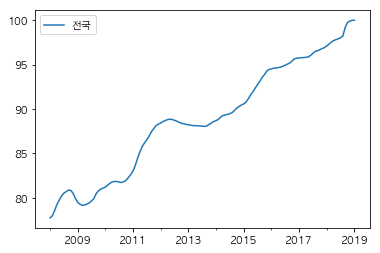

In [101]:
# [예제 2.15] 특정 지역에 원하는 시간대의 데이터를 가져와 그래프 그리기 

new_data['전국']['전국']['2008-01':].plot(legend='전국')
plt.show()

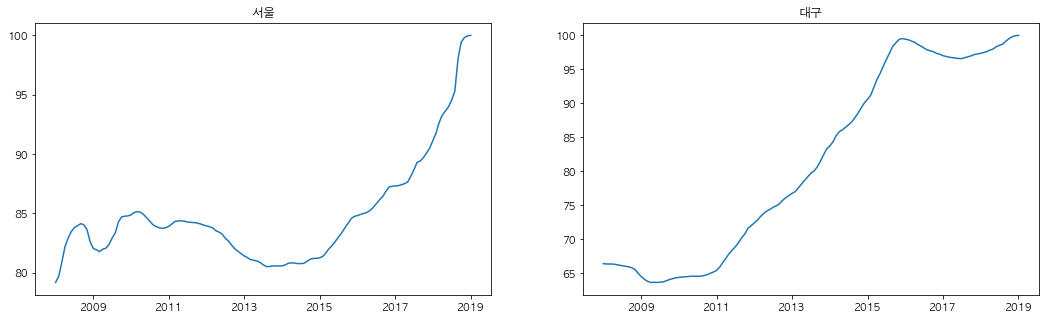

In [111]:
# [예제 2.16] subplot을 이용해 서울과 대구 그래프 그리기

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1, 2, 2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()

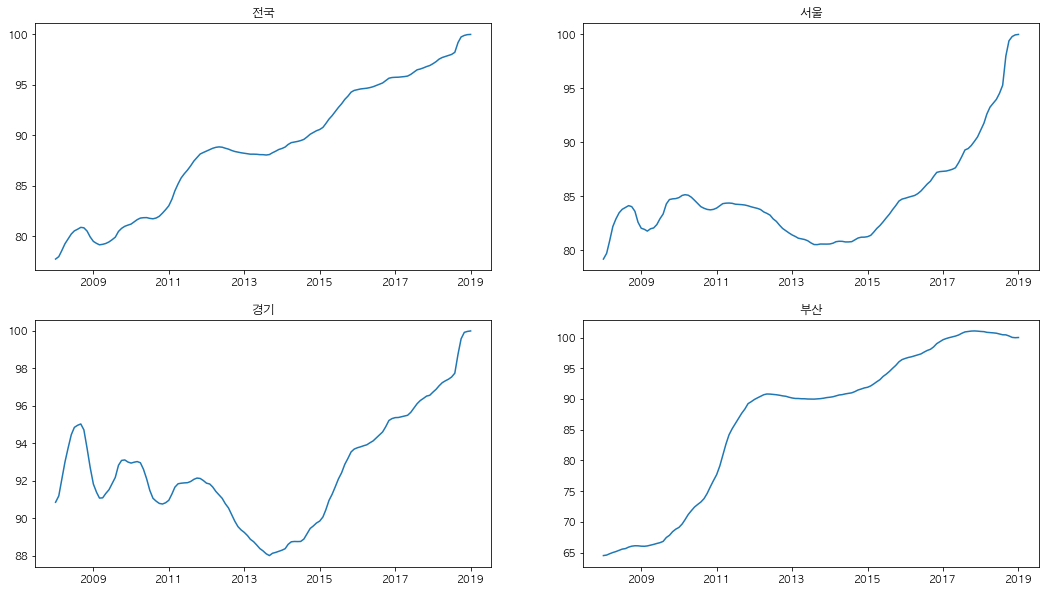

In [110]:
# [예제 2.17] for 문을 이용해 여러 개의 subplot을 그리는 코드  

spots = '전국 서울 경기 부산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(18, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

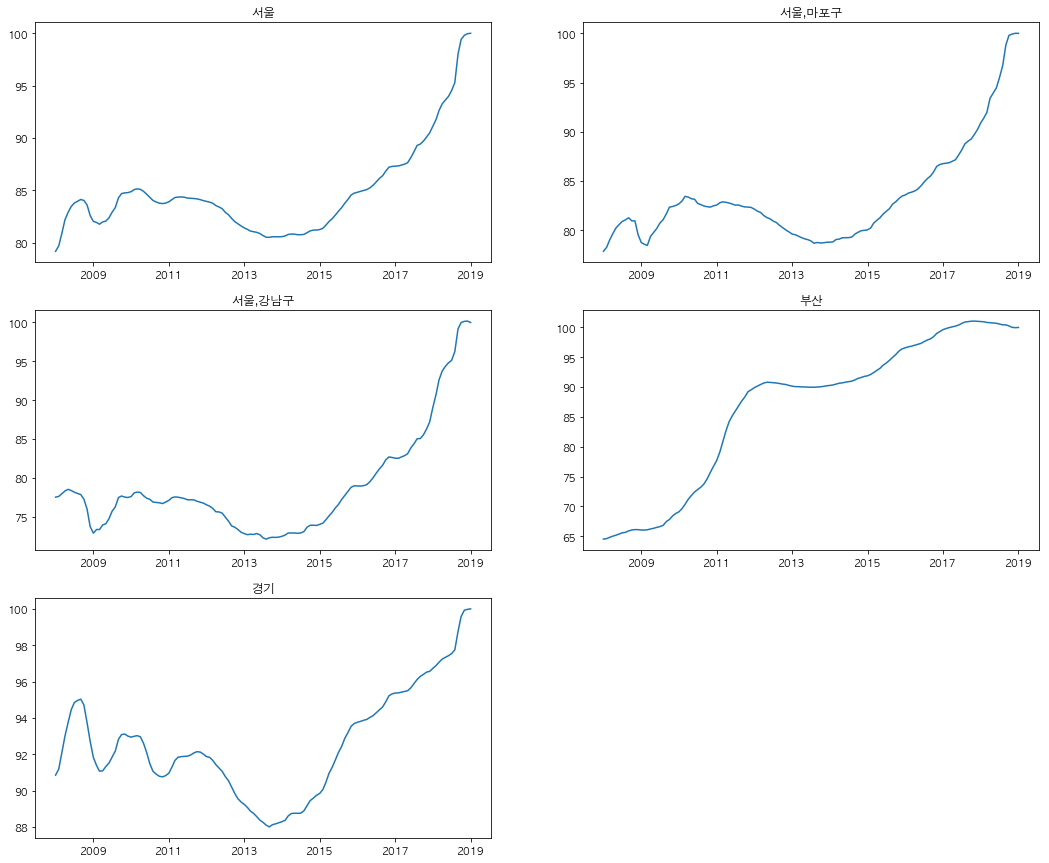

In [109]:
# [예제 2.18] 시-도 안의 구 지역 가격지수까지 subplot으로 그래프 그리기 

spots = '서울 서울,마포구 서울,강남구 부산 경기'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(18, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

In [115]:
# [예제 2.19] 특정 날짜의 전 지역 가격지수 데이터 가져오기 
# new_data.loc['2018-1-1']
new_data['경기'].loc['2018-1-1']

경기      96.7313
수원      96.8549
장안구     96.2301
권선구     98.6436
팔달구     97.5487
영통구     95.4547
성남      89.8353
수정구     98.6517
중원구     95.8488
분당구     85.1302
고양      97.9229
덕양구     95.9381
일산동구    99.3629
일산서구    99.7618
안양      93.3058
만안구     93.8506
동안구     92.9705
부천      96.8604
의정부     99.5185
광명      87.9716
평택      105.008
안산      102.415
단원구     102.244
상록구     102.679
과천      93.0972
구리      94.5987
남양주     98.4485
용인      94.1505
처인구     100.861
기흥구     94.3392
수지구     90.6857
시흥      101.259
군포      95.5867
의왕         None
하남         None
오산         None
파주      100.047
이천       100.63
안성         None
김포      97.8485
양주         None
동두천        None
광주         None
화성      99.0944
Name: 2018-01-01 00:00:00, dtype: object

In [116]:
# [예제 2.20] 두 날짜 사이의 부동산 가격지수 증감률 구하기

(new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100

전국     전국        2.71782
서울     서울        7.45916
       강북        6.28865
       강북구       3.50238
       광진구       6.17848
       노원구        8.0608
       도봉구       5.96115
       동대문구      7.25846
       마포구       8.76415
       서대문구      5.84091
       성동구       9.57512
       성북구       6.37586
       용산구       6.60563
       은평구       3.43851
       종로구       3.31066
       중구         5.5936
       중랑구       4.82731
       강남        8.61713
       강남구       12.8312
       강동구       9.07697
       강서구       6.16242
       관악구        5.1142
       구로구       6.22878
       금천구       5.69557
       동작구       7.30872
       서초구       10.3545
       송파구       10.2294
       양천구       8.28218
       영등포구      10.1712
6개광역시  6개광역시     1.78998
                  ...   
전북     익산        3.74243
       군산       -1.99949
전남     전남        3.57889
       목포        1.95352
       순천        5.01259
       광양            NaN
       여수        3.52615
경북     경북       -4.95762
       포항       -3.66031


In [118]:
# [예제 2.21] 가격지수 증감률 정렬하기 

diff = (new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100
diff.sort_values()

경남   성산구     -10.5885
경북   구미      -7.29792
경남   의창구     -6.39471
     창원      -5.33845
경북   북구      -5.08298
경남   진해구     -4.97543
경북   경북      -4.95762
울산   동구      -4.59458
충북   상당구     -4.47669
울산   북구      -4.45814
충남   서북구      -4.3601
경북   경산       -4.1517
대구   달서구     -3.95174
충남   천안      -3.68873
충북   서원구     -3.67813
경북   포항      -3.66031
충북   청주      -3.64568
대구   달성군     -3.57861
충북   흥덕구     -3.38192
경남   김해      -3.27566
충남   아산      -3.16048
충북   청원구      -3.1224
대구   북구      -3.04554
경남   경남      -3.03774
충북   충북      -2.89914
충남   동남구     -2.87457
     충남      -2.87065
대구   대구      -2.08554
전북   군산      -1.99949
경남   마산회원구   -1.95677
               ...   
서울   양천구      8.28218
     강남       8.61713
     마포구      8.76415
     강동구      9.07697
     성동구      9.57512
     영등포구     10.1712
     송파구      10.2294
     서초구      10.3545
경기   분당구      11.0664
서울   강남구      12.8312
부산   강서구          NaN
경기   의왕           NaN
     하남           NaN
     오산           NaN
     안성   

In [121]:
# [예제 2.22] 누락된 지역 삭제 및 상위, 하위 10개만 출력 

# 부동산 가격지수 증감률 구하기
# 2016년 - 2018년 부동산 가격지수 증감률 계산
diff = ((new_data.loc['2018-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100).dropna()
print("하위 10개")
print(diff.sort_values()[:10])
print(' ')
print("상위 10개")
print(diff.sort_values(ascending=False)[:10])

하위 10개
경남  성산구   -10.5885
경북  구미    -7.29792
경남  의창구   -6.39471
    창원    -5.33845
경북  북구    -5.08298
경남  진해구   -4.97543
경북  경북    -4.95762
울산  동구    -4.59458
충북  상당구   -4.47669
울산  북구    -4.45814
dtype: object
 
상위 10개
서울  강남구     12.8312
경기  분당구     11.0664
서울  서초구     10.3545
    송파구     10.2294
    영등포구    10.1712
    성동구     9.57512
    강동구     9.07697
    마포구     8.76415
    강남      8.61713
    양천구     8.28218
dtype: object


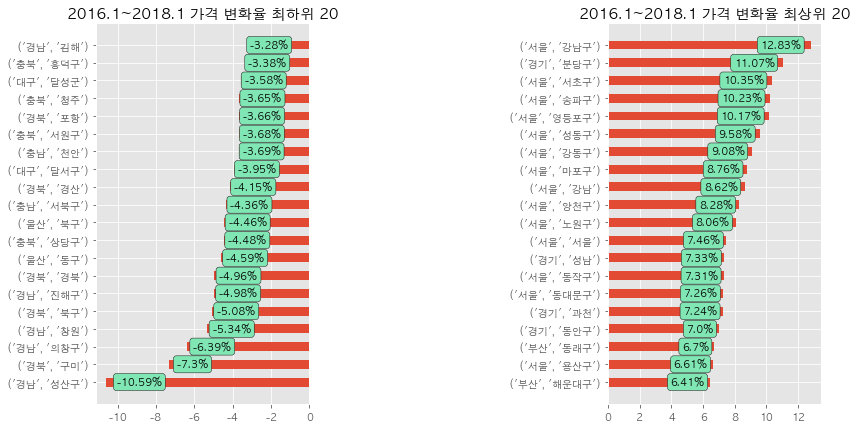

In [120]:
# [예제 2.23] 가격지수 증감률을 막대그래프로 시각화

import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13, 7))
# numpy 모듈을 이용해 0부터 19까지 배열을 생성 및 저장, 막대 그래프 bar의 위치로 0이 맨 밑이고 그 위로 하나씩 올라가는 형태로 인한 배열 생성
ind = np.arange(20)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values,  align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[:20].values[i],2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))

# subplot 설정 1행 3열의 첫 번째 sub 그래프
ax2 = fig.add_subplot(1, 3, 3)
plt.title('2016.1~2018.1 가격 변화율 최상위 20')
# barh 함수(bar 위치의 배열, 구체적인 수치의 배열, algin='center', height=0.5)를 통해 각 인덱스와 값을 입력
rects2 = plt.barh(ind, diff.sort_values()[-20:].values,  align='center', height=0.5)
# yticks 함수를 통해 각 인덱스와 이름 태그를 입력
plt.yticks(ind,  diff.sort_values()[-20:].index)
# 막대마다 수치를 달아주는 작업
for i, rect in enumerate(rects2):
    # text 함수(값이 출력되는 X 축의 위치, 값이 출력되는 Y 축의 위치, 해당 위치에 출력할 값을 전달)를 통해 수치 매핑
    ax2.text(0.95 * rect.get_width(),
             rect.get_y() + rect.get_height() / 2.0,
             str(round(diff.sort_values()[-20:].values[i],2)) + '%', 
             ha='right', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))

plt.show()

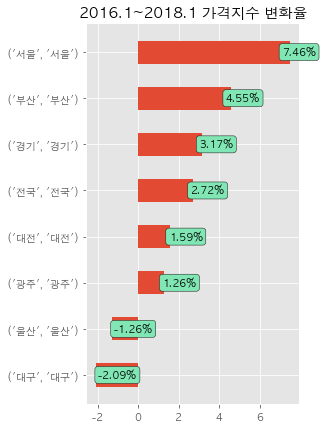

In [122]:
# [예제 2.24] 특정 지역만 선택해서 가격지수 증감률을 막대그래프로 시각화

loca =  '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(" ")
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(",")
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))

diff = ((new_data.loc['2018-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2016-1-1', loca_list] * 100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13, 7))
ind = np.arange(num)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격지수 변화율')
rects = plt.barh(ind, diff.head(num).values,  align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(round(diff.head(20).values[i], 2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))


plt.show()